## Notebook to explore how to customise colours of protein surface representations

In [13]:
import nglview as nv
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

## Prepare data

In [2]:
scores_df = pd.read_csv("../data/fret_1_flynn_et_al.csv", sep="\t")
scores_df = scores_df[scores_df[" aa"] != "*"] # exclude functional stops

# squash per residue using mean. might have to change this later bc
# ceil/floor of arrays is more important in mutations?
fn_scores = []
for residue_number, data in scores_df.groupby(by="Position"):
    fn_score = data["functional score"].mean()
    # set to be between 0 and 1.
    if fn_score > 1:
        fn_score = 1 
    elif fn_score < 0:
        fn_score = 0
    fn_scores.append(fn_score)



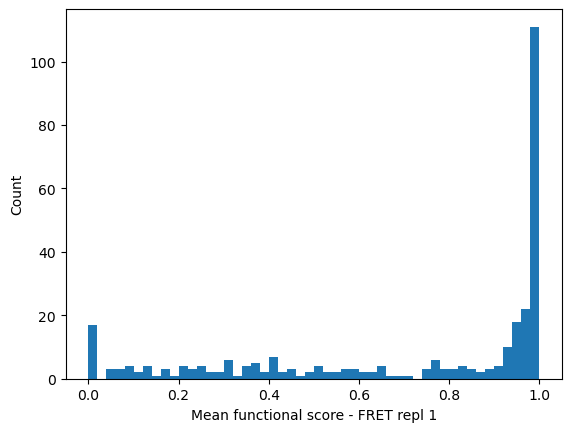

In [3]:
# check distribution.
plt.hist(fn_scores, bins=50)
plt.ylabel("Count")
plt.xlabel("Mean functional score - FRET repl 1")
plt.show()

## Show functional scores on complex

In [26]:
def show_colorbar(gradient_scheme, bins):
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)

    cmap = mpl.colors.ListedColormap(gradient_scheme)
    # cmap.set_over('0.25')
    # cmap.set_under('0.75')

    bounds = bins
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
    #                                 boundaries=[0] + bounds + [13],
    #                                 extend='both',
                                    ticks=bounds,
                                    spacing='proportional',
                                    orientation='horizontal')
    cb2.set_label('Mean fitness score')
    plt.show()

In [4]:
len(fn_scores) # something wrong here.

303

In [5]:
# make a color registry for NGLview based on functional scores.
# first set the gradient hex colors. Made using the amazing https://colordesigner.io/gradient-generator
gradient_scheme =  [
                "#fa6e6e",
                "#f96c88",
                "#f16fa1",
                "#e375b7",
                "#cf7eca",
                "#b787d9",
                "#9c90e2",
                "#7e98e5",
                "#609ee3",
                "#44a3dc",
                "#2fa6d2",
                    ]
# now create a nested list in the way that NGLview likes it, i.e. [["color_n", "idx_n"], ["color_n+1", "idx_n+1"]].
# numpy can determine which bin each value belongs in.
bin_idces = np.digitize(fn_scores, np.linspace(0, 1, 11))
bin_idces = [ idc-1 for idc in bin_idces ] # arrays start at 0 tyvm

# build the color scheme.
color_scheme = []
for res_num, idx in enumerate(bin_idces):
    color_scheme.append([gradient_scheme[idx], str(res_num)])
nv.color.ColormakerRegistry.add_selection_scheme(
    "my_custom_scheme", color_scheme)

In [29]:
# load paxlovid Mpro structure for now.
view = nv.show_pdbid("7VH8", default_representation=False) 

# add high-quality surface.
view.add_surface("protein", color="my_custom_scheme", surfaceType="av")

# add the ligand.
view.add_ball_and_stick("ligand")
view.center()

view

NGLWidget()

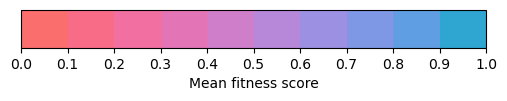

In [30]:
show_colorbar(gradient_scheme, np.linspace(0, 1, 11))

looks like there are 3 residues missing from the input data (shown in white surface on complex), safe to ignore for now.